# **Requirements**

Working with Sentinel-1 level-2 products requires some packages to be installed on your machine. These packages are:

* Numpy (manipulate with arrays and matrices)
* Cartopy (Advanced geographic plotting)
* NetCDF4 (accessing netcdf file format)
* matplotlib (to handle graphs and plots)
* zipfile (to access the contents of raw Sentinel files)

To install the packages use following two cells (without exclamation marks).

In [1]:
import zipfile as zf
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import os

# Data import

OCN-OWI product is located in a subfolder of the .SAFE file which is downloaded from Copernicus web service. To access the OCN products we should first extract the Zip file.

All you need to do is to introduce the zip file name which you download from sentinel-hub to the program.

In [2]:
directory_path = '../Documents/00.SAR_data/00.Level_2_data/'  # Assuming zip files are in the current directory
directory_sentinel_level_2_data = './Documents/Offshore Wind Research/data/sentinel_level_2_data/'

# os.listdir(directory_path)

file_name = directory_sentinel_level_2_data + os.listdir(directory_sentinel_level_2_data)[0]

FileNotFoundError: [Errno 2] No such file or directory: './Documents/Offshore Wind Research/data/sentinel_level_2_data/'

In [9]:
# Opening the Sentinel-1 OCN product...
# file_name = '/content/drive/My Drive/00.OffshoreWindResearch/00.RemoteSensingData/00.Sentinel1_SAR/S1A_IW_OCN__2SDH_20230523T105753_20230523T105815_048660_05DA3B_F6DF.zip'

with zf.ZipFile(file_name, 'r') as zip:
  # Extract the file in the current directory.
  zip.extractall()
  # Print all containing files and folders.
  zip.printdir()

File Name                                             Modified             Size
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/ 2019-04-21 07:50:42            0
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/support/ 2019-04-21 07:50:44            0
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/support/s1-object-types.xsd 2019-04-21 07:50:42        60608
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/support/s1-map-overlay.xsd 2019-04-21 07:50:42          450
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/support/s1-product-preview.xsd 2019-04-21 07:50:44          440
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/support/s1-level-2-measurement.xsd 2019-04-21 07:50:42          471
S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/measurement/ 2019-04-21 07:50:42            0
S1A_IW_OCN__2SDH_20190420T224949_2

In [8]:
import os
import zipfile
zip_files = [f for f in os.listdir(directory_path) if f.endswith('.zip')]


In [43]:
len(zip_files)

5775

In [37]:
set_ondemand = set(zip_files)

In [11]:
directory_pkl = '../Documents'
os.listdir(directory_pkl)

['.ipynb_checkpoints',
 '00.SAR_data',
 'CCNM_Sentinel-1 OWI product.ipynb',
 'ReadingSAR_Data.ipynb',
 'file_list.pkl']

In [16]:
import pickle

# Assuming you have a .pkl file in your folder_path
pkl_file_path = os.path.join(directory_pkl, 'file_list.pkl')  # Replace 'your_file.pkl' with the actual file name

# Open the .pkl file in read binary mode ('rb')
with open(pkl_file_path, 'rb') as f:
  # Load the data from the file using pickle.load()
  data = pickle.load(f)

# Now 'data' contains the contents of the .pkl file
# print(data) 
set_drive = set(data)

In [39]:
granule_search_missing_files = list(set_drive - set_ondemand)
# granule_search_missing_files

granule_search_missing_files_names = [f.replace('.zip', '') for f in granule_search_missing_files]
granule_search_missing_files_names[:5]

['S1B_IW_OCN__2SDV_20190815T103235_20190815T103300_017595_021196_EB92',
 'S1B_IW_OCN__2SDV_20180327T104837_20180327T104903_010216_01290B_79F6',
 'S1A_IW_OCN__2SDV_20240604T225132_20240604T225157_054180_0696C8_FB20',
 'S1B_IW_OCN__2SDV_20210716T104049_20210716T104114_027818_0351C8_E16B',
 'S1B_IW_OCN__2SDV_20191129T104853_20191129T104918_019141_02420B_A1D4']

In [21]:
import asf_search as asf

session = asf.ASFSession()

In [22]:
import getpass
username = input('Username:')
password = getpass.getpass('Password:')

try:
    user_pass_session = asf.ASFSession().auth_with_creds(username, password)
except asf.ASFAuthenticationError as e:
    print(f'Auth failed: {e}')
else:
    print('Success!')

Username: camiloxddd
Password: ········


Success!


In [40]:
results = asf.granule_search(granule_search_missing_files_names)

results.download(
    path=directory_path,
    session=user_pass_session,
    processes=10)

In [ ]:
# prompt: get the list of paths in directory_path

import os

def get_zip_file_paths(directory_path):
    """
    Get a list of .zip file paths within the specified directory.
    """
    zip_file_paths = []
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.endswith('.zip'):  # Only add files with .zip extension
                zip_file_paths.append(os.path.join(root, file))
    return zip_file_paths

# Example usage:
file_list = get_zip_file_paths(directory_path)


In [ ]:
len(file_list)
output_folder = '/content/drive/MyDrive/00.OffshoreWindResearch/00.RemoteSensingData/00.Sentinel1_SAR/00.NC_Files'


In [41]:
# for i in file_list:

#   with zipfile.ZipFile(i, 'r') as zip_ref:
#               # Loop through the files in the zip archive
#     for member in zip_ref.namelist():
#       if member.endswith('.nc'):
#         nc_filename = os.path.basename(member)
#         nc_output_path = os.path.join(output_folder, nc_filename)
#         with zip_ref.open(member) as nc_file, open(nc_output_path, 'wb') as f:
#             f.write(nc_file.read())
#             print(f"Extracting .nc file: {member}")
    # print(zip_ref.namelist())

In [ ]:
# prompt: I want to read the first 5 files (.zip), and take the nc file. I want the dataset.variables['owiWindSpeed']
%%timeit
import os
import zipfile

def process_zip_files(directory, num_files=None):
  """Reads the first `num_files` zip files in a directory, extracts the .nc files,
  and returns the 'owiWindSpeed' variable from each file.
  """

  zip_files = [f for f in os.listdir(directory) if f.endswith('.zip')]
  owiWindSpeed = []
  owiWindDirection = []
  lat = []
  lon = []

  for zip_file in zip_files[:num_files]:
      zip_path = os.path.join(directory, zip_file)
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
          for member in zip_ref.namelist():
              if member.endswith('.nc'):
                  with zip_ref.open(member) as nc_file:
                      try:
                          dataset = nc.Dataset('sample.nc', memory=nc_file.read())
                          # owiWindSpeed = dataset.variables['owiWindSpeed']
                          owiSpeed = np.array(dataset.variables['owiWindSpeed'])
                          owiSpeed[owiSpeed == -999.0] = np.nan
                          owiWindSpeed.append(owiSpeed)


                          owiDir = np.array(dataset.variables['owiWindDirection'])
                          owiDir[owiDir == -999.0] = np.nan
                          owiWindDirection.append(owiDir)
                          owiLat = np.array(dataset.variables['owiLat'])
                          lat.append(owiLat)

                          owiLon = np.array(dataset.variables['owiLon'])
                          lon.append(owiLon)

                      except Exception as e:
                          print(f"Error processing {zip_file}: {e}")
                      break
  return owiWindSpeed, owiWindDirection, lat, lon


# Example usage:
directory_path = '/content/drive/My Drive/00.OffshoreWindResearch/00.RemoteSensingData/00.Sentinel1_SAR'  # Assuming zip files are in the current directory
owiWindSpeed, owiWindDirection, lat, lon = process_zip_files(directory_path, 10)

# Now you can work with the extracted 'owiWindSpeed' variables in owiWindSpeed_variables


The slowest run took 5.14 times longer than the fastest. This could mean that an intermediate result is being cached.
2.45 s ± 1.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
owiWindSpeed[0]
# owiWindDirection[3]

array([[4.4, 4.4, 4.2, ..., nan, nan, nan],
       [4.2, 4.3, 4.3, ..., nan, nan, nan],
       [4.6, 4.5, 4.3, ..., nan, nan, nan],
       ...,
       [nan, 6.2, 6.3, ..., nan, nan, nan],
       [nan, 6.4, 6.1, ..., nan, nan, nan],
       [nan, 6.5, 6.3, ..., nan, nan, nan]], dtype=float32)

In [3]:
# Accessing the OWI sub-product.
nc_file = '../Documents/S1A_IW_OCN__2SDH_20190420T224949_20190420T225014_026880_0305CC_6952.SAFE/measurement/s1a-iw-ocn-hh-20190420t224856-20190420t224928-026880-0305CC-001.nc'
# nc_file = '/content/S1A_IW_OCN__2SDH_20230523T105753_20230523T105815_048660_05DA3B_F6DF.SAFE/measurement/s1a-iw-ocn-hh-20230523t105748-20230523t105815-048660-05DA3B-001.nc'
dataset = nc.Dataset(nc_file)

# Just to check what information is stored in the netCDF file.
print(dataset.dimensions.keys())

dict_keys(['rvlRaSize', 'length', 'rvlAzSize', 'rvlSwath', 'owiRaSize', 'owiAzSize', 'owiIncSize', 'owiPolarisation', 'oswRaSize', 'oswAzSize', 'oswWavenumberBinSize', 'oswAngularBinSize', 'oswPartitions', 'oswKxBinSize', 'oswKyBinSize', 'oswLag'])


In [4]:
dataset.variables.keys()

dict_keys(['oswPolSpec', 'oswPartitions', 'oswQualityCrossSpectraRe', 'oswQualityCrossSpectraIm', 'oswK', 'oswPhi', 'oswAzCutoff', 'oswRaCutoff', 'oswSpecRes', 'oswLon', 'oswLat', 'oswHs', 'oswWl', 'oswDirmet', 'oswSnr', 'oswAmbiFac', 'oswIconf', 'oswLookSeparationTime', 'oswNrcs', 'oswInten', 'oswNv', 'oswSkew', 'oswKurt', 'oswWindSpeed', 'oswWindDirection', 'oswEcmwfWindSpeed', 'oswEcmwfWindDirection', 'oswWindSeaHs', 'oswWaveAge', 'oswDepth', 'oswNlWidth', 'oswLandFlag', 'oswLandCoverage', 'oswIncidenceAngle', 'oswHeading', 'oswGroundRngSize', 'oswAziSize', 'oswEllipsLength', 'oswEllipsLengthStdDev', 'oswEllipsWidth', 'oswEllipsWidthStdDev', 'oswGroupDir', 'oswQualityFlagPartition', 'oswQualityFlag', 'oswTotalHs', 'oswCartSpecIm', 'oswCartSpecRe', 'oswKx', 'oswKy', 'owiHs', 'owiWl', 'owiDirmet', 'owiWindSeaHs', 'owiLon', 'owiLat', 'owiIncidenceAngle', 'owiElevationAngle', 'owiWindSpeed', 'owiWindDirection', 'owiEcmwfWindSpeed', 'owiEcmwfWindDirection', 'owiNrcs', 'owiNesz', 'owiNrcs

In [5]:
dataset.variables['oswWindSpeed']

<class 'netCDF4._netCDF4.Variable'>
float32 oswWindSpeed(oswAzSize, oswRaSize)
    units: m/s
    long_name: SAR Wind speed
unlimited dimensions: 
current shape = (1, 1)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
# Become familiar with the file format.
print(dataset.dimensions['owiAzSize'])
print(dataset.dimensions['owiRaSize'])
print(dataset.dimensions['owiIncSize'])
print(dataset.dimensions['owiPolarisation'])

<class 'netCDF4._netCDF4.Dimension'>: name = 'owiAzSize', size = 167
<class 'netCDF4._netCDF4.Dimension'>: name = 'owiRaSize', size = 255
<class 'netCDF4._netCDF4.Dimension'>: name = 'owiIncSize', size = 153
<class 'netCDF4._netCDF4.Dimension'>: name = 'owiPolarisation', size = 2


In [7]:
np.array(dataset.variables['owiWindSpeed'])[100]

array([   7.3431683,    7.4582977,    7.59495  ,    7.71368  ,
          7.812356 ,    7.707584 ,    7.6554146,    7.5978236,
          7.723499 ,    7.330702 ,    6.661328 ,    6.2926188,
          6.205298 ,    6.164646 ,    6.1045065,    6.1537833,
          6.307841 ,    6.3710194,    6.54047  ,    6.5345235,
          6.5119834,    6.4553256,    6.3219438,    6.688579 ,
          6.735658 ,    6.5278354,    6.41293  ,    6.22629  ,
          6.2264204,    6.6112103,    6.5343876,    6.5786176,
          6.421526 ,    6.5024104,    6.592114 ,    6.865568 ,
          6.610799 ,    6.8816323,    7.0857296,    6.796526 ,
          7.1426606,    6.861063 ,    6.471633 ,    5.933131 ,
          6.671541 ,    7.0171223,    7.115797 ,    7.2690187,
          7.4276195,    8.482413 ,    8.7151375,    8.326087 ,
          7.8356023,    8.854167 ,    8.799807 ,    7.8330946,
          7.427851 ,    7.202774 ,    6.704445 ,    6.9138675,
          6.803126 ,    7.374833 ,    7.735789 ,    7.1

Using ```variables``` method we can see what is inside the netCDF file. Besides all OCN products, there exists OWI related data which are latitudes, longitudes, wind speed, wind direction, etc.

Each variable's details can be obtained through its name.



In [8]:
print(dataset.variables.keys())
print('Wind Speed Data \n', dataset.variables['owiWindSpeed'])
print('Wind Direction Data \n', dataset.variables['owiWindDirection'])

dict_keys(['oswPolSpec', 'oswPartitions', 'oswQualityCrossSpectraRe', 'oswQualityCrossSpectraIm', 'oswK', 'oswPhi', 'oswAzCutoff', 'oswRaCutoff', 'oswSpecRes', 'oswLon', 'oswLat', 'oswHs', 'oswWl', 'oswDirmet', 'oswSnr', 'oswAmbiFac', 'oswIconf', 'oswLookSeparationTime', 'oswNrcs', 'oswInten', 'oswNv', 'oswSkew', 'oswKurt', 'oswWindSpeed', 'oswWindDirection', 'oswEcmwfWindSpeed', 'oswEcmwfWindDirection', 'oswWindSeaHs', 'oswWaveAge', 'oswDepth', 'oswNlWidth', 'oswLandFlag', 'oswLandCoverage', 'oswIncidenceAngle', 'oswHeading', 'oswGroundRngSize', 'oswAziSize', 'oswEllipsLength', 'oswEllipsLengthStdDev', 'oswEllipsWidth', 'oswEllipsWidthStdDev', 'oswGroupDir', 'oswQualityFlagPartition', 'oswQualityFlag', 'oswTotalHs', 'oswCartSpecIm', 'oswCartSpecRe', 'oswKx', 'oswKy', 'owiHs', 'owiWl', 'owiDirmet', 'owiWindSeaHs', 'owiLon', 'owiLat', 'owiIncidenceAngle', 'owiElevationAngle', 'owiWindSpeed', 'owiWindDirection', 'owiEcmwfWindSpeed', 'owiEcmwfWindDirection', 'owiNrcs', 'owiNesz', 'owiNrcs

As it is seen above, the fill value, which is used for regions where there is no data, is -999.0. We change this value with NaN to be able to handle the images easily.

The following graphs are just to check the arrays and values within them.

(<Axes: title={'center': 'OWI Wind Direction'}>,
 Text(0.5, 1.0, 'OWI Wind Direction'))

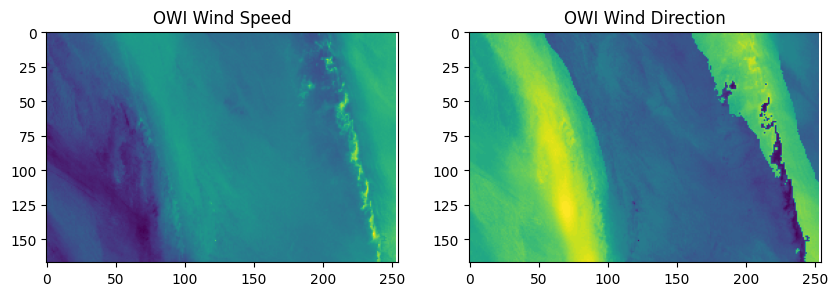

In [9]:
owiSpeed = np.array(dataset.variables['owiWindSpeed'])
owiSpeed[owiSpeed == -999.0] = np.nan

owiDir = np.array(dataset.variables['owiWindDirection'])
owiDir[owiDir == -999.0] = np.nan

fig = plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(owiSpeed, cmap='viridis'), plt.title('OWI Wind Speed')
plt.subplot(122), plt.imshow(owiDir, cmap='viridis'), plt.title('OWI Wind Direction')


To be able to correctly register the image on a projection system, latitudes and longitudes are required which are store in related variables. Change them to array type for further usage.

In [10]:
lat = np.array(dataset.variables['owiLat'])
lon = np.array(dataset.variables['owiLon'])
# the result is the same for lines below...
# lat = dataset.variables['owiLat'][:]
# lon = dataset.variables['owiLon'][:]
print(lat)
print(lon)

[[35.73571  35.737404 35.739094 ... 36.131523 36.132965 36.134407]
 [35.744705 35.7464   35.74809  ... 36.140514 36.141956 36.1434  ]
 [35.753704 35.755394 35.757088 ... 36.149506 36.150948 36.15239 ]
 ...
 [37.21116  37.212856 37.21455  ... 37.605297 37.606728 37.608162]
 [37.220154 37.221848 37.223545 ... 37.61428  37.615715 37.617146]
 [37.229145 37.230843 37.232536 ... 37.62327  37.624702 37.626133]]
[[-74.00143  -73.99057  -73.97971  ... -71.25149  -71.240524 -71.22955 ]
 [-74.00357  -73.99271  -73.98185  ... -71.25332  -71.24235  -71.231384]
 [-74.00571  -73.99485  -73.983986 ... -71.25514  -71.24418  -71.23321 ]
 ...
 [-74.35651  -74.34544  -74.33437  ... -71.55322  -71.542046 -71.53086 ]
 [-74.35869  -74.347626 -74.33656  ... -71.55508  -71.54389  -71.532715]
 [-74.36088  -74.349815 -74.338745 ... -71.55693  -71.545746 -71.53456 ]]


# Creating the map
All the magic is happening here.



1.   Create a plot,
2.   set coordinate system for the geographic illustration purposes,
3.   to put every pixel in its correct (lat, lon) coordinate, use the `lat` and `lon` arrays,
4.   colormap can be assigned through `cmap`,
5.   set the title and extents of the map,
6.   use cartopy features to draw coastlines and land regions with proper resolution,
7.   add the colorbar which shows the wind speed values,
8.   calculate dx and dy values from directions of windDirection array. Directions are measured in degrees from North,
9.   finalize the map with corresponding coordinates and gridlines.

Your beautiful map is ready!




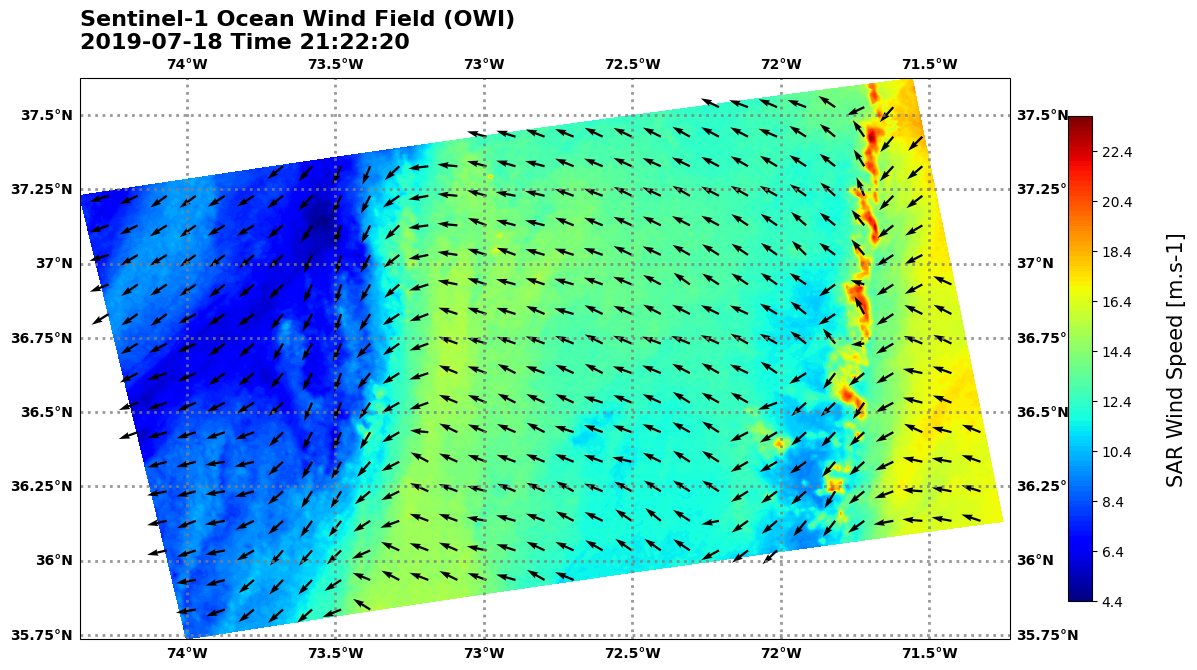

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Draw Wind Speed Data
carto_map = ax.contourf(lon, lat, owiSpeed, 100,
                        transform=ccrs.PlateCarree(),
                        cmap='jet')

title = 'Sentinel-1 Ocean Wind Field (OWI)\n2019-07-18 Time 21:22:20'
ax.set_title(title,
             fontsize=16,
             fontweight='bold',
             loc='left')

# Extents
ax.set_xlim((np.amin(lon), np.amax(lon)))
ax.set_ylim((np.amin(lat), np.amax(lat)))

# Mask land regions and coastlines
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                            edgecolor='face', facecolor='w'))
ax.coastlines(resolution='10m', linewidth=2, color='black')

# Colorbar
cbar = plt.colorbar(carto_map, shrink=0.42)
cbar.set_label('SAR Wind Speed [m.s-1]',
               fontsize=15,
               labelpad=25)

# Draw wind speed vectors
dx = np.cos(owiDir * np.pi / 180)  # u
dy = np.sin(owiDir * np.pi / 180)  # v
ax.quiver(lon, lat, dx, dy, angles="xy", color="black", regrid_shape=20)

# Draw gridlines and lat lon ticks on the axis
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.8, linestyle=':')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}

# Loading all the files into Numpy arrays

In [ ]:
import os
import zipfile as zf
import netCDF4 as nc
import numpy as np

def process_zip_files(directory):
    """Reads all zip files in a directory, extracts the .nc files,
    and returns the 'owiWindSpeed' and 'owiWindDirection' variables from each file.
    """

    zip_files = [f for f in os.listdir(directory) if f.endswith('.zip')]
    owiWindSpeed = []
    owiWindDirection = []

    for zip_file in zip_files:
        zip_path = os.path.join(directory, zip_file)
        with zf.ZipFile(zip_path, 'r') as zip_ref:
            for member in zip_ref.namelist():
                if member.endswith('.nc'):
                    # Extract the .nc file temporarily
                    with zip_ref.open(member) as nc_file:
                        try:
                            # Create a temporary file to read
                            temp_nc_path = '/tmp/temp.nc'  # Temporary file path
                            with open(temp_nc_path, 'wb') as temp_file:
                                temp_file.write(nc_file.read())

                            # Now open the temporary file with netCDF4
                            dataset = nc.Dataset(temp_nc_path)

                            # Read the variables of interest
                            owiSpeed = np.array(dataset.variables['owiWindSpeed'])
                            owiSpeed[owiSpeed == -999.0] = np.nan
                            owiWindSpeed.append(owiSpeed)

                            owiDir = np.array(dataset.variables['owiWindDirection'])
                            owiDir[owiDir == -999.0] = np.nan
                            owiWindDirection.append(owiDir)

                        except Exception as e:
                            print(f"Error processing {zip_file}: {e}")

                    # No break here to read all .nc files in the zip

    return owiWindSpeed, owiWindDirection

directory_path = '/content/drive/My Drive/00.OffshoreWindResearch/00.RemoteSensingData/00.Sentinel1_SAR'  # Assuming zip files are in the current directory
i, j = process_zip_files(directory_path)

In [ ]:
# Convert lists to arrays if needed
all_owiSpeed = np.concatenate(all_owiSpeed, axis=0)
all_owiDir = np.concatenate(all_owiDir, axis=0)
all_lat = np.concatenate(all_lat, axis=0)
all_lon = np.concatenate(all_lon, axis=0)

# Saving code for later

In [ ]:

dataset = nc.Dataset(file_list[0])

owiSpeed = np.array(dataset.variables['owiWindSpeed'])
owiSpeed[owiSpeed == -999.0] = np.nan

owiDir = np.array(dataset.variables['owiWindDirection'])
owiDir[owiDir == -999.0] = np.nan
lat = np.array(dataset.variables['owiLat'])
lon = np.array(dataset.variables['owiLon'])